Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
transactions.isnull().values.any()

False

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [5]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
pd.to_datetime('02.01.2013', format='%m.%d.%Y').month

2

In [11]:
transactions['date_formatted'] = transactions['date'].apply(lambda x: pd.to_datetime(x, format='%d.%m.%Y', errors='coerce'))

In [12]:
transactions['month'] = transactions['date_formatted'].map(lambda x: x.month)
transactions['year'] = transactions['date_formatted'].map(lambda x: x.year)

In [13]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_formatted,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,1,2013
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,1,2013
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,1,2013
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1,2013
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1,2013


In [14]:
filtered_transactions = transactions.loc[(transactions['month'] == 9) & (transactions['year'] == 2014)]

In [15]:
filtered_transactions.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_formatted,month,year
1953691,24.09.2014,20,5,1039,899.0,1.0,2014-09-24,9,2014
1953692,27.09.2014,20,5,1015,449.0,1.0,2014-09-27,9,2014
1953693,07.09.2014,20,5,1329,399.0,1.0,2014-09-07,9,2014
1953694,27.09.2014,20,5,984,399.0,1.0,2014-09-27,9,2014
1953695,08.09.2014,20,5,984,399.0,1.0,2014-09-08,9,2014
1953696,29.09.2014,20,5,982,749.0,1.0,2014-09-29,9,2014
1953697,05.09.2014,20,5,972,299.0,1.0,2014-09-05,9,2014
1953698,17.09.2014,20,5,1010,299.0,1.0,2014-09-17,9,2014
1953699,27.09.2014,20,5,1041,899.0,1.0,2014-09-27,9,2014
1953700,13.09.2014,20,5,1249,299.0,1.0,2014-09-13,9,2014


In [16]:
filtered_transactions['item_true_value'] = filtered_transactions['item_price'] * filtered_transactions['item_cnt_day']

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
filtered_transactions.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_formatted,month,year,item_true_value
1953691,24.09.2014,20,5,1039,899.0,1.0,2014-09-24,9,2014,899.0
1953692,27.09.2014,20,5,1015,449.0,1.0,2014-09-27,9,2014,449.0
1953693,07.09.2014,20,5,1329,399.0,1.0,2014-09-07,9,2014,399.0
1953694,27.09.2014,20,5,984,399.0,1.0,2014-09-27,9,2014,399.0
1953695,08.09.2014,20,5,984,399.0,1.0,2014-09-08,9,2014,399.0


In [18]:
f = {'item_true_value': lambda df: filtered_transactions.loc[df.index].item_true_value.sum()}

revenue_by_shops = filtered_transactions.groupby('shop_id').agg(f).item_true_value

In [19]:
revenue_by_shops.head()

shop_id
2    1473540.00
3    1228425.00
4    1211556.00
5    1350828.02
6    3480397.00
Name: item_true_value, dtype: float64

In [20]:
# YOUR CODE GOES HERE

max_revenue = revenue_by_shops.max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [21]:
filtered_transactions_summer_2014 = transactions.loc[
    (transactions['month'] >= 6) & (transactions['year'] == 2014) & (transactions['month'] <= 8)
]

In [22]:
filtered_transactions_summer_2014['item_category_id'] = filtered_transactions_summer_2014['item_id'].map(lambda x: items.loc[x].item_category_id)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
filtered_transactions_summer_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_formatted,month,year,item_category_id
1705909,15.06.2014,17,26,9532,399.00,1.0,2014-06-15,6,2014,30
1705910,10.06.2014,17,26,9507,149.00,1.0,2014-06-10,6,2014,40
1705911,13.06.2014,17,26,9509,246.32,1.0,2014-06-13,6,2014,37
1705912,03.06.2014,17,26,9532,399.00,1.0,2014-06-03,6,2014,30
1705913,08.06.2014,17,26,9532,399.00,1.0,2014-06-08,6,2014,30


In [24]:
filtered_transactions_summer_2014['item_true_value'] = filtered_transactions_summer_2014['item_price'] * filtered_transactions_summer_2014['item_cnt_day']

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
filtered_transactions_summer_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_formatted,month,year,item_category_id,item_true_value
1705909,15.06.2014,17,26,9532,399.00,1.0,2014-06-15,6,2014,30,399.00
1705910,10.06.2014,17,26,9507,149.00,1.0,2014-06-10,6,2014,40,149.00
1705911,13.06.2014,17,26,9509,246.32,1.0,2014-06-13,6,2014,37,246.32
1705912,03.06.2014,17,26,9532,399.00,1.0,2014-06-03,6,2014,30,399.00
1705913,08.06.2014,17,26,9532,399.00,1.0,2014-06-08,6,2014,30,399.00


In [26]:
f = {'item_true_value': lambda df: filtered_transactions_summer_2014.loc[df.index].item_true_value.sum()}
revenue_by_categories = filtered_transactions_summer_2014.groupby('item_category_id').agg(f)

In [27]:
revenue_by_categories.head()

,item_true_value
item_category_id,
2,2755520.0
3,6854669.8
4,38833.2
5,418233.1
6,3360382.5


In [28]:
revenue_by_categories.idxmax()

item_true_value    20
dtype: int64

In [29]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [30]:
transactions_grouped_by_items = transactions.groupby('item_id')

In [31]:
f = {'item_price': lambda df: transactions.loc[df.index].item_price.nunique()}
unique_price_count = transactions_grouped_by_items.agg(f)

In [32]:
unique_price_count.loc[unique_price_count['item_price'] == 1].shape

(5926, 1)

In [33]:
items.shape

(22170, 3)

In [34]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [36]:
transactions_shop_25_dec_2014 = transactions.loc[
    (transactions['month'] == 12) & (transactions['year'] == 2014) & (transactions['shop_id'] == 25)
]

In [47]:
transactions_shop_25_dec_2014['day'] = transactions_shop_25_dec_2014['date_formatted'].map(lambda x: x.day)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
transactions_shop_25_dec_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_formatted,month,year,day
2295837,14.12.2014,23,25,21752,399.0,1.0,2014-12-14,12,2014,14
2295838,13.12.2014,23,25,21752,399.0,3.0,2014-12-13,12,2014,13
2295839,26.12.2014,23,25,21733,149.0,1.0,2014-12-26,12,2014,26
2295840,31.12.2014,23,25,21732,149.0,1.0,2014-12-31,12,2014,31
2295841,30.12.2014,23,25,21726,149.0,1.0,2014-12-30,12,2014,30


In [54]:
f = {'item_cnt_day': lambda df: transactions_shop_25_dec_2014.loc[df.index].item_cnt_day.sum()}
grouped_by_day = transactions_shop_25_dec_2014.groupby('day').agg(f)

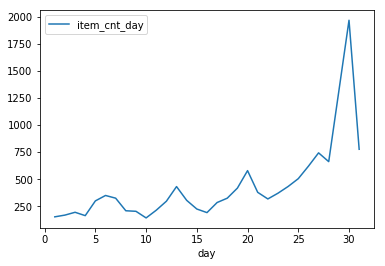

In [57]:
# plt.ylabel('Num items')
# plt.xlabel('Day')
# plt.title("Daily revenue for shop_id = 25")
grouped_by_day.plot()

In [62]:
grouped_by_day.var()

item_cnt_day    117167.702299
dtype: float64

In [63]:
total_num_items_sold_var = 117167.702299
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

Current answer for task total_num_items_sold_var is: 117167.702299


## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [64]:
STUDENT_EMAIL = 'jackyho112dev@gmail.com'
STUDENT_TOKEN = 'PXGoaQYg9yOiQPeN'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [65]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)